<a href="https://colab.research.google.com/github/Awantika3/DScode/blob/master/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Stock Market Analysis and Prediction

I want to invest in share market for which I have always been curious that whether data science can help me to analyse and predict the share market. Simply I was trying to figure out if I can get rich without investing lots of money, by using data science. I short-listed the 5 companies which have low share price at this point and can give maximum profit in future. 

Those 5 companies are 
1.   American Airlines
2.   Snap Chat
3.   American Eagle
4.   AstraZeneca
5.   Luckin Coffee

First part is analysation with virtualistion and in second part I tried to predict the future price by using the previous years data.




##Part 1 : Analysis

In [0]:
import numpy as np 
import pandas as pd 
import pandas_datareader
import datetime
import matplotlib.pyplot as plt 
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [0]:
import pandas_datareader.data as web
start = datetime.datetime(2008,1,1)
end = datetime.date.today()
american_airlines = web.DataReader("AAL", "yahoo", start, end)
snap = web.DataReader("SNAP", "yahoo", start, end)
american_eagle = web.DataReader("AEO", "yahoo", start, end)
AstraZeneca = web.DataReader("AZN", "yahoo", start, end)
Luckin_coffee = web.DataReader("LK", "yahoo", start, end)
american_airlines.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,14.58,13.25,14.55,13.32,3908000.0,12.557317
2008-01-03,13.62,12.65,13.30,12.72,4739200.0,11.991672
2008-01-04,12.70,11.95,12.70,12.41,4828000.0,11.699421
2008-01-07,12.93,12.06,12.40,12.23,4456000.0,11.529728
2008-01-08,12.25,10.96,12.22,11.01,5240600.0,10.379581


In [0]:
snap.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-02,26.049999,23.500000,24.000000,24.480000,217048900,24.480000
2017-03-03,29.440001,26.059999,26.389999,27.090000,148166400,27.090000
2017-03-06,28.250000,23.770000,28.170000,23.770000,72903000,23.770000
2017-03-07,22.500000,20.639999,22.209999,21.440001,71857800,21.440001
2017-03-08,23.430000,21.309999,22.030001,22.809999,49819100,22.809999


In [0]:
american_eagle.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,21.250000,20.500000,20.799999,20.610001,5179400.0,13.993765
2008-01-03,20.799999,19.420000,20.680000,19.639999,6266100.0,13.335155
2008-01-04,19.400000,18.160000,19.400000,18.930000,7782200.0,12.853078
2008-01-07,19.080000,18.129999,19.000000,18.770000,4700100.0,12.744439
2008-01-08,18.840000,17.740000,18.770000,17.780001,5044700.0,12.072250


In [0]:
AstraZeneca.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,21.480000,21.125000,21.434999,21.215000,1142600.0,11.104029
2008-01-03,21.440001,21.215000,21.315001,21.375000,2795000.0,11.187776
2008-01-04,21.165001,20.795000,21.125000,20.825001,3477600.0,10.899902
2008-01-07,21.610001,21.215000,21.379999,21.594999,3006800.0,11.302927
2008-01-08,22.330000,21.924999,22.305000,21.945000,2618800.0,11.486116


In [0]:
Luckin_coffee.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-05-20,21.02,18.40,21.02,18.610001,8186600,18.610001
2019-05-21,18.74,17.33,18.59,17.330000,8572300,17.330000
2019-05-22,17.33,14.70,17.00,14.750000,19697300,14.750000
2019-05-23,15.95,13.71,14.47,15.790000,9626500,15.790000
2019-05-24,15.70,14.77,15.44,15.320000,4826000,15.320000


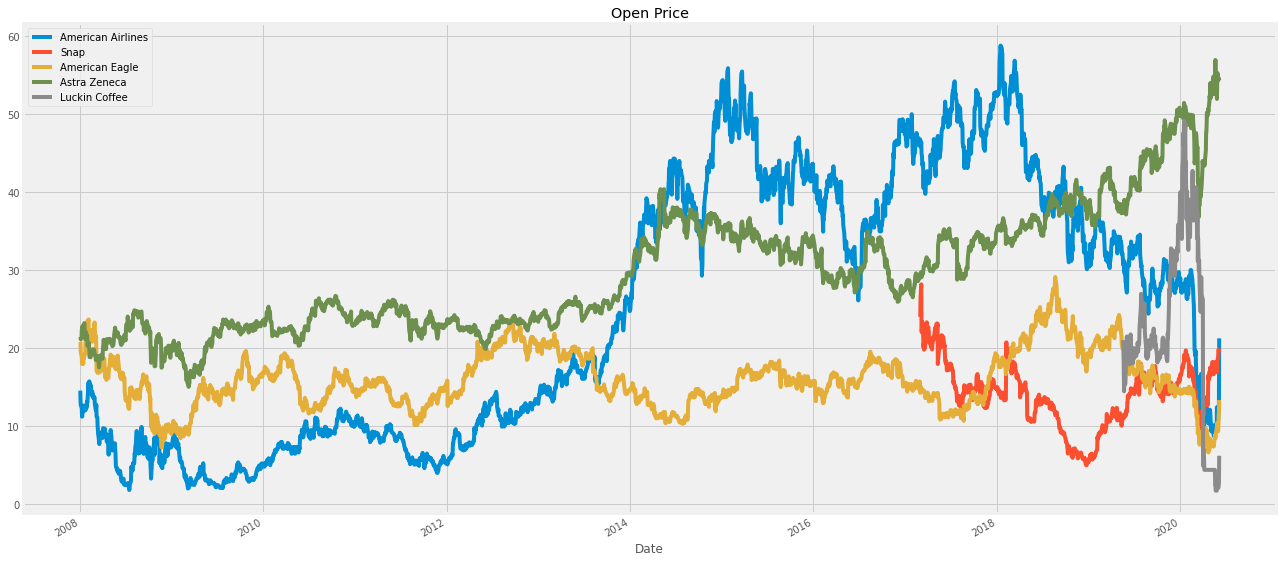

In [0]:
#Plot of opening prices
american_airlines['Open'].plot(label='American Airlines', figsize=(20,10), title='Open Price')
snap['Open'].plot(label='Snap')
american_eagle['Open'].plot(label='American Eagle')
AstraZeneca['Open'].plot(label='Astra Zeneca')
Luckin_coffee['Open'].plot(label='Luckin Coffee')
plt.legend()

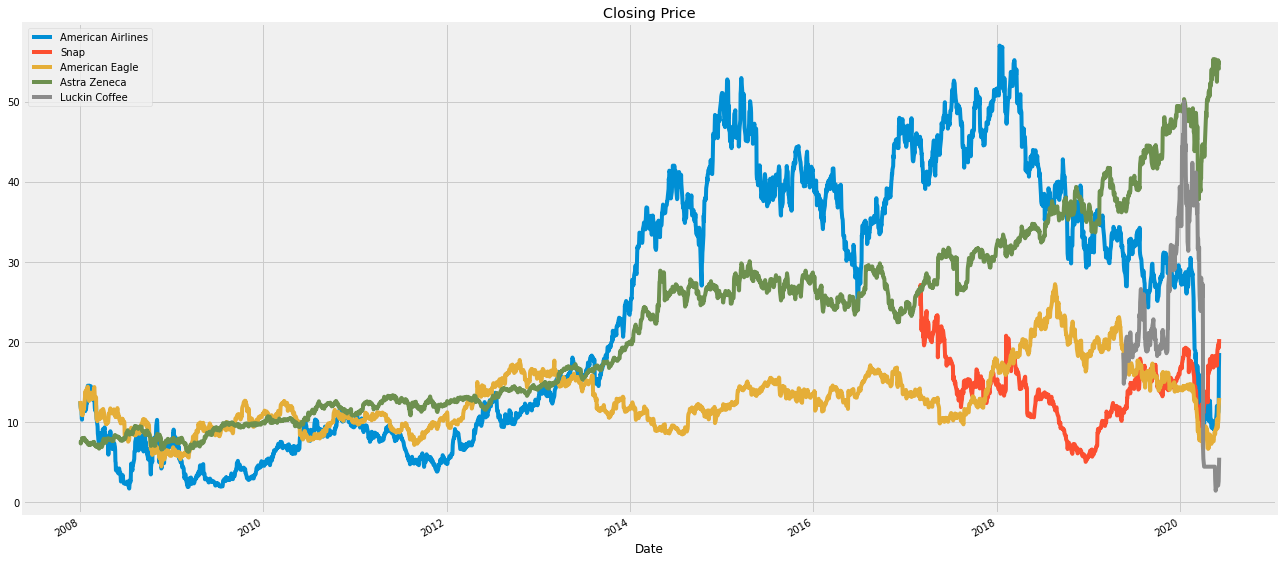

In [0]:
#Plot of closing prices
american_airlines['Adj Close'].plot(label='American Airlines', figsize=(20,10), title='Closing Price')
snap['Adj Close'].plot(label='Snap')
american_eagle['Adj Close'].plot(label='American Eagle')
AstraZeneca['Adj Close'].plot(label='Astra Zeneca')
Luckin_coffee['Adj Close'].plot(label='Luckin Coffee')
plt.legend()

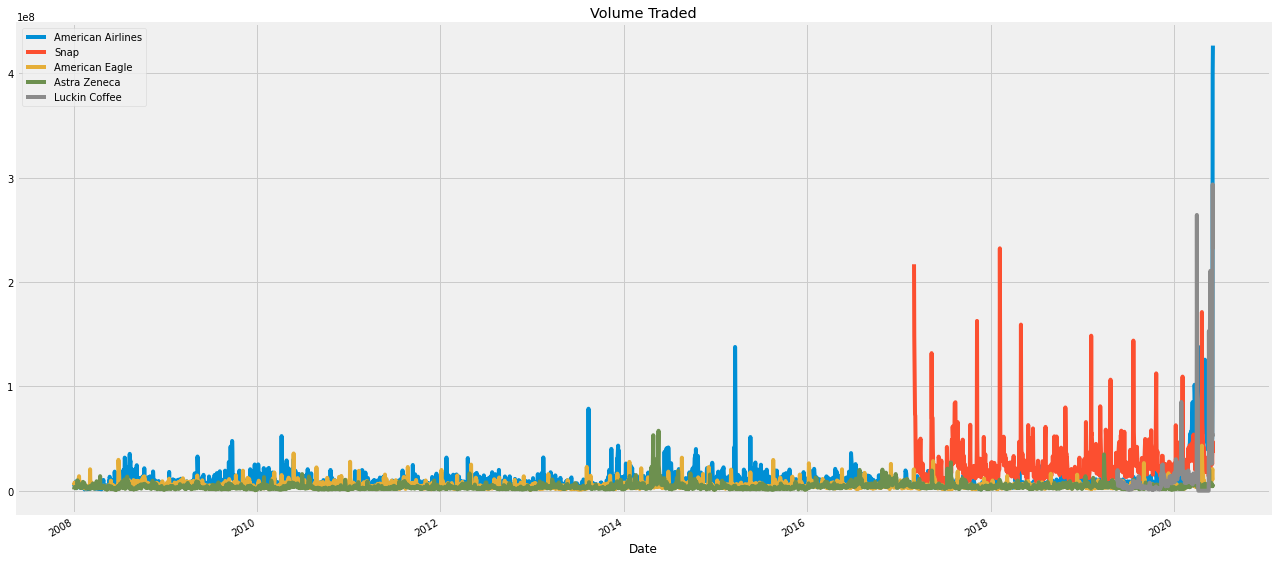

In [0]:
#Plot of Daily Volume
american_airlines['Volume'].plot(label='American Airlines', figsize=(20,10), title='Volume Traded')
snap['Volume'].plot(label='Snap')
american_eagle['Volume'].plot(label='American Eagle')
AstraZeneca['Volume'].plot(label='Astra Zeneca')
Luckin_coffee['Volume'].plot(label='Luckin Coffee')
plt.legend()

In [0]:
#Dates of maximum trading volumes for each
american_airlines['Volume'].idxmax()

Timestamp('2020-06-05 00:00:00')

In [0]:
snap['Volume'].idxmax()

Timestamp('2018-02-07 00:00:00')

In [0]:
american_eagle['Volume'].idxmax()

Timestamp('2020-04-22 00:00:00')

In [0]:
AstraZeneca['Volume'].idxmax()

Timestamp('2014-05-19 00:00:00')

In [0]:
Luckin_coffee['Volume'].idxmax()

Timestamp('2020-06-04 00:00:00')

In [0]:
#Total trade
american_airlines['Total Traded'] = american_airlines['Open']*american_airlines['Volume']
snap['Total Traded'] = snap['Open']*snap['Volume']
american_eagle['Total Traded'] = american_eagle['Open']*american_eagle['Volume']
AstraZeneca['Total Traded'] = AstraZeneca['Open']*AstraZeneca['Volume']
Luckin_coffee['Total Traded'] = Luckin_coffee['Open']*Luckin_coffee['Volume']

Text(0, 0.5, 'Total Traded')

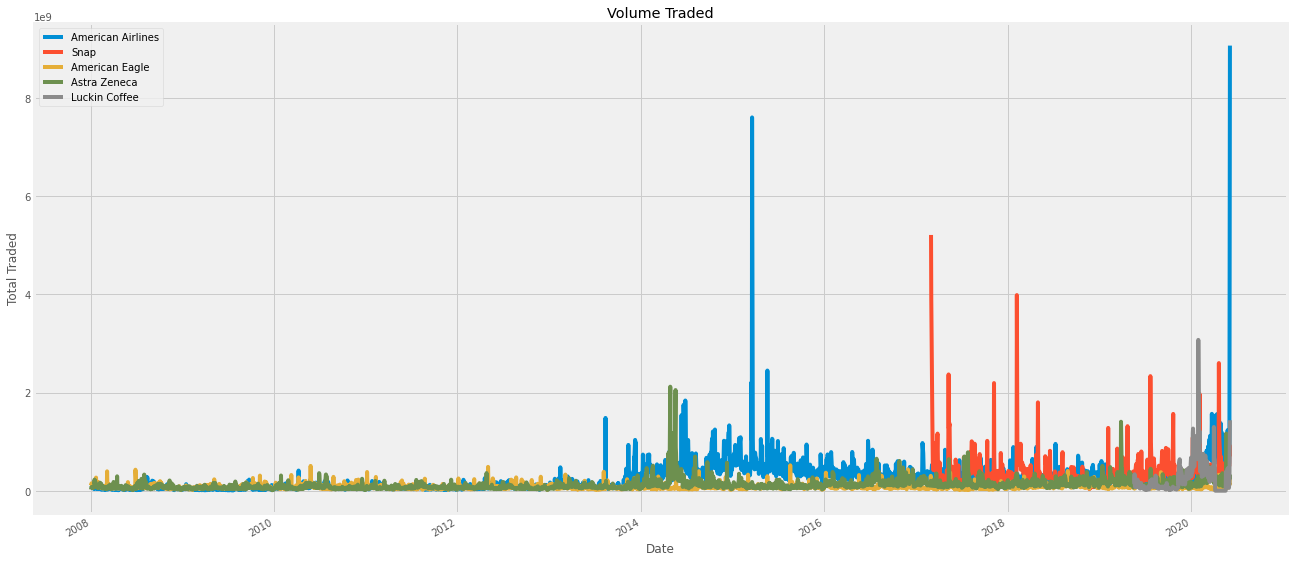

In [0]:
#Plot of total trade
american_airlines['Total Traded'].plot(label='American Airlines', figsize=(20,10), title='Volume Traded')
snap['Total Traded'].plot(label='Snap')
american_eagle['Total Traded'].plot(label='American Eagle')
AstraZeneca['Total Traded'].plot(label='Astra Zeneca')
Luckin_coffee['Total Traded'].plot(label='Luckin Coffee')
plt.legend()
plt.ylabel('Total Traded')

It can be observed that in year 2015 there was a tremendous rise in American Airline stock prices. Lets try to find the exact date and what was the cause of the rise. 

In [0]:
american_airlines['Total Traded'].idxmax()

Timestamp('2020-06-05 00:00:00')

This happen because of the following reasons:

American merged with U.S. Airways in 2014 to create the biggest airline group in the world.

Oil prices fell more than $1 per barrel in 2015 summer.

American airlines increased price of tickets. 

In [0]:
#Calculating the return from close price column. 
american_airlines['returns'] = american_airlines['Close'].pct_change(1)
snap['returns'] = snap['Close'].pct_change(1)
american_eagle['returns'] = american_eagle['Close'].pct_change(1)
AstraZeneca['returns'] = AstraZeneca['Close'].pct_change(1)
Luckin_coffee['returns'] = Luckin_coffee['Close'].pct_change(1)


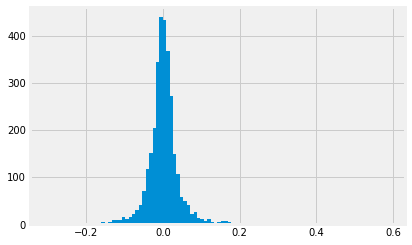

In [0]:
#Ploting histogram for checking most volatile stock
american_airlines['returns'].hist(bins = 100)

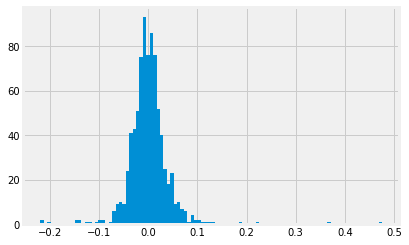

In [0]:
snap['returns'].hist(bins = 100)

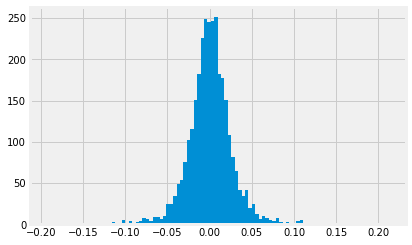

In [0]:
american_eagle['returns'].hist(bins = 100)

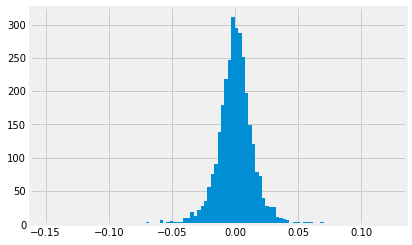

In [0]:
AstraZeneca['returns'].hist(bins = 100) 

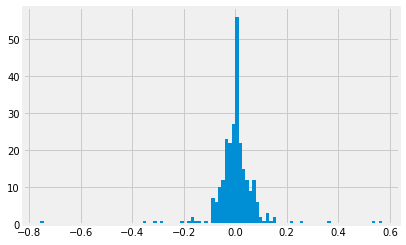

In [0]:
Luckin_coffee['returns'].hist(bins = 100)

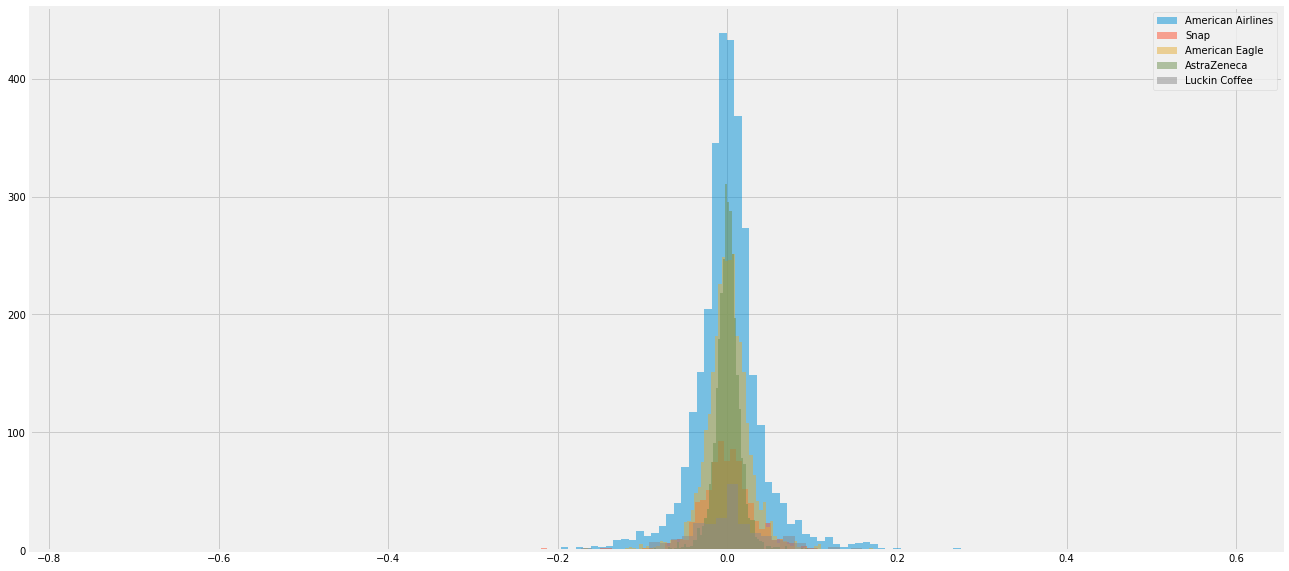

In [0]:
#Stacked Histogram
american_airlines['returns'].hist(bins = 100, label='American Airlines', figsize=(20,10), alpha = 0.5)
snap['returns'].hist(bins = 100, label = 'Snap', alpha = 0.5)
american_eagle['returns'].hist(bins = 100, label = 'American Eagle', alpha = 0.5)
AstraZeneca['returns'].hist(bins = 100, label = 'AstraZeneca', alpha = 0.5) 
Luckin_coffee['returns'].hist(bins = 100, label = 'Luckin Coffee', alpha = 0.5)
plt.legend()

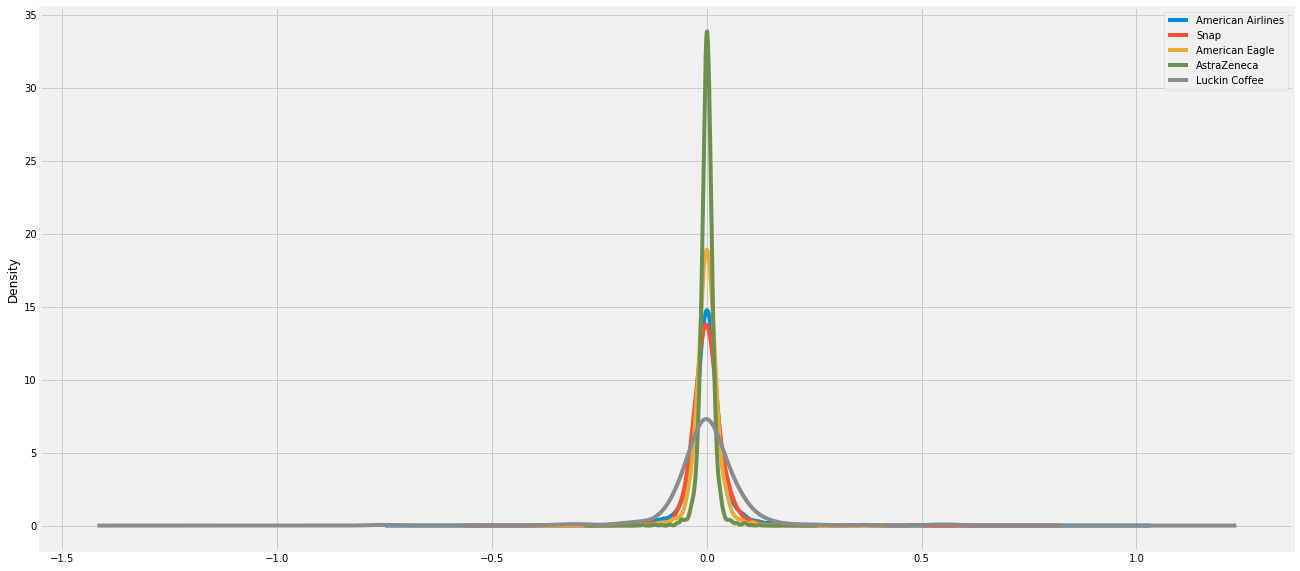

In [0]:
#KDE plot to check most widest plot
american_airlines['returns'].plot(kind = 'kde', label='American Airlines', figsize=(20,10))
snap['returns'].plot(kind = 'kde', label = 'Snap')
american_eagle['returns'].plot(kind = 'kde', label = 'American Eagle')
AstraZeneca['returns'].plot(kind = 'kde', label = 'AstraZeneca') 
Luckin_coffee['returns'].plot(kind = 'kde', label = 'Luckin Coffee')
plt.legend()

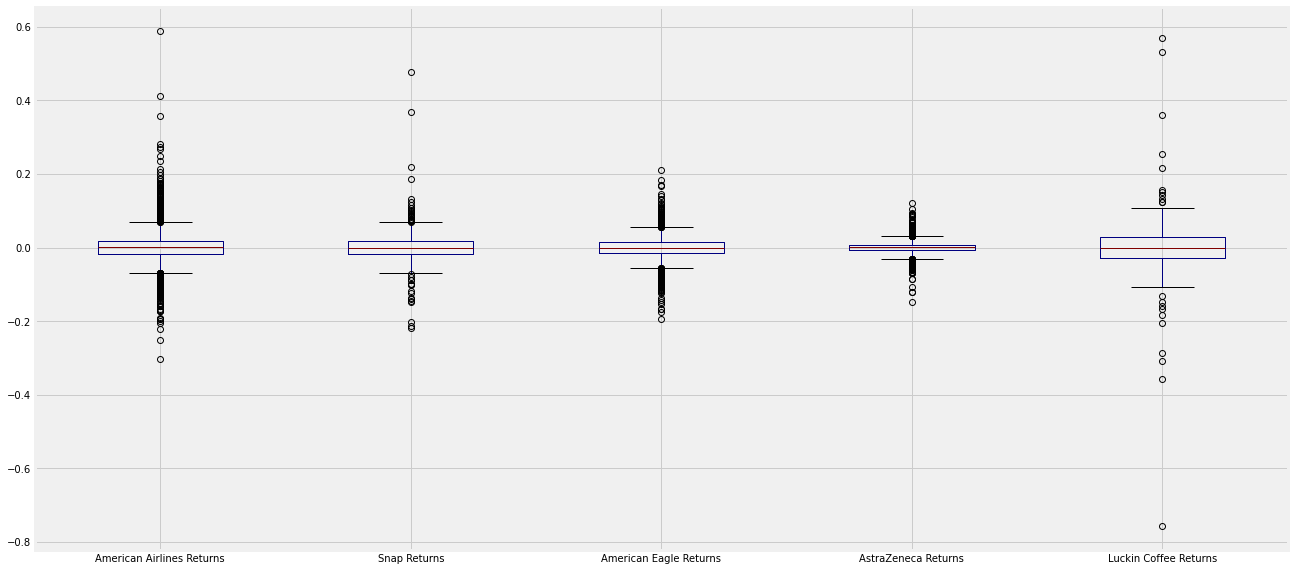

In [0]:
#Plot box plot to show the information depending on least, first quartile, middle, third quartile, and most extreme.
box_df = pd.concat([american_airlines['returns'], snap['returns'], american_eagle['returns'], AstraZeneca['returns'], Luckin_coffee['returns']], axis =1)
box_df.columns = ['American Airlines Returns', 'Snap Returns', 'American Eagle Returns', 'AstraZeneca Returns', 'Luckin Coffee Returns']
box_df.plot(kind = 'box', figsize=(20,10), colormap = 'jet')

In [0]:
#Calculate cumulative daily return
american_airlines['Cumulative Returns'] = (1 + american_airlines['returns']).cumprod()
snap['Cumulative Returns'] = (1 + snap['returns']).cumprod()
american_eagle['Cumulative Returns'] = (1 + american_eagle['returns']).cumprod()
AstraZeneca['Cumulative Returns'] = (1 + AstraZeneca['returns']).cumprod() 
Luckin_coffee['Cumulative Returns'] = (1 + Luckin_coffee['returns']).cumprod()

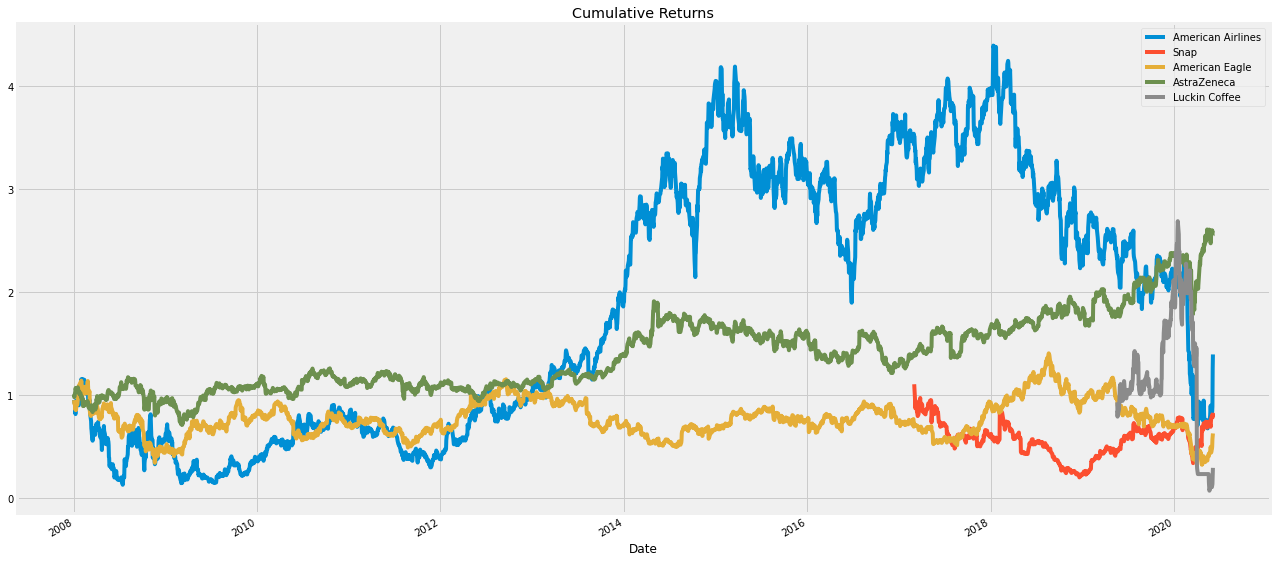

In [0]:
#Plot cumulative return column against the time series index. If the cumulative return is above 1, then its making profit else its in loss. 
american_airlines['Cumulative Returns'].plot(label='American Airlines', figsize=(20,10), title='Cumulative Returns')
snap['Cumulative Returns'].plot(label = 'Snap')
american_eagle['Cumulative Returns'].plot(label = 'American Eagle')
AstraZeneca['Cumulative Returns'].plot(label = 'AstraZeneca')
Luckin_coffee['Cumulative Returns'].plot(label = 'Luckin Coffee') 
plt.legend()

##Part2 : Prediction

Concluding the above analysis, 'American Airlines' look promising. Plus keeping into consideration that the price of shares are the lowest at this point of time, as everything started going back to normal after the covid situation and country starts reopening it can be predicted that there will be a rise in American Airlines share price. In this part I tried to predict the share price by using LSTM model. 



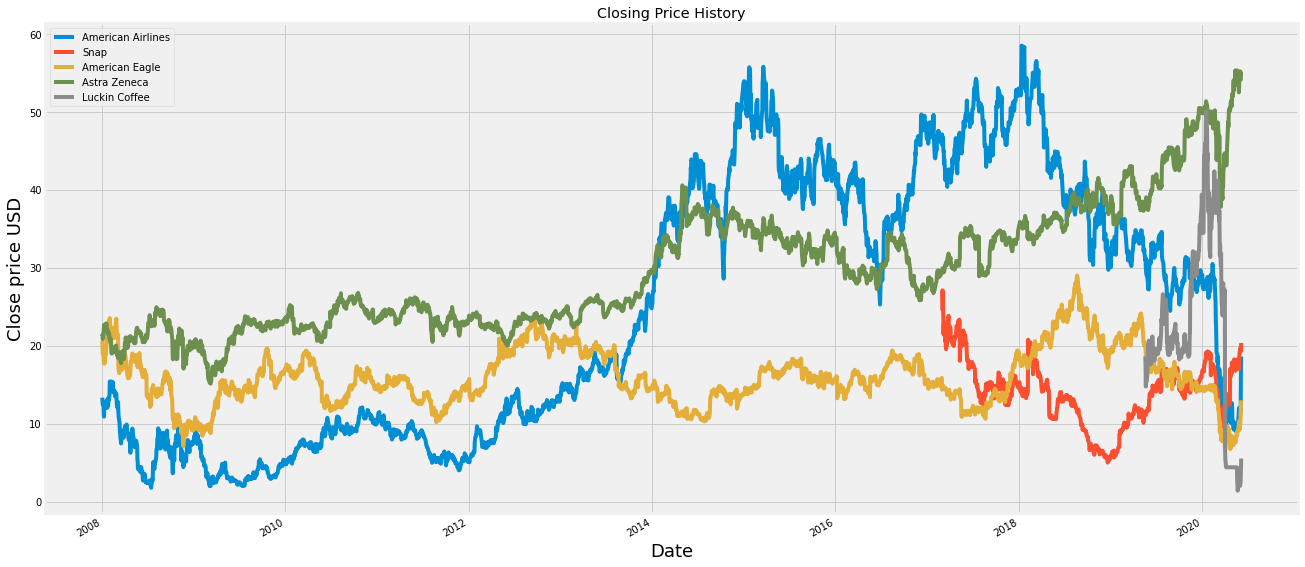

In [0]:
#Plot close column
american_airlines['Close'].plot(label='American Airlines', figsize=(20,10), title='Closing Price History')
snap['Close'].plot(label='Snap')
american_eagle['Close'].plot(label='American Eagle')
AstraZeneca['Close'].plot(label='Astra Zeneca')
Luckin_coffee['Close'].plot(label='Luckin Coffee')
plt. xlabel('Date', fontsize =18)
plt. ylabel('Close price USD', fontsize =18)
plt.legend()

In [0]:
data_ama = american_airlines.filter(['Close'])
dataset = data_ama.values
training_data = math.ceil(len(dataset)* .8)
training_data

2504

In [0]:
data_ama = american_airlines.filter(['Close'])
dataset = data_ama.values
training_data = math.ceil(len(dataset)* .8)
training_data

2504

In [0]:
#Scale the data
scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = scalar.fit_transform(dataset)
scaled_data

array([[0.20384411],
       [0.19326398],
       [0.18779756],
       ...,
       [0.17792277],
       [0.26379825],
       [0.29677305]])

In [0]:
#Create training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data, :]
#Split data into x_train and y_train
X_train = []
y_train = []
for i in range(60, len(train_data)):
  X_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(X_train)
    print(y_train)
    print()

[array([0.20384411, 0.19326398, 0.18779756, 0.18462351, 0.16311056,
       0.16099454, 0.19026627, 0.17862811, 0.18127314, 0.18956092,
       0.19008993, 0.18956092, 0.19679069, 0.18092048, 0.20067008,
       0.19220595, 0.18568153, 0.20402045, 0.19996474, 0.20490213,
       0.21301358, 0.24034562, 0.22394639, 0.22553341, 0.23946394,
       0.24052194, 0.23646623, 0.23540821, 0.23170516, 0.23911126,
       0.21654029, 0.22306471, 0.21424792, 0.219538  , 0.2146006 ,
       0.20666548, 0.21054487, 0.21389526, 0.21230823, 0.2008464 ,
       0.18762122, 0.18039146, 0.19132427, 0.19396932, 0.17280903,
       0.16275788, 0.15041439, 0.14494797, 0.12801976, 0.12343502,
       0.11514724, 0.10033503, 0.10968083, 0.11761594, 0.122906  ,
       0.12943044, 0.1297831 , 0.11937929, 0.11356021, 0.12008463])]
[0.1260800511698139]

[array([0.20384411, 0.19326398, 0.18779756, 0.18462351, 0.16311056,
       0.16099454, 0.19026627, 0.17862811, 0.18127314, 0.18956092,
       0.19008993, 0.18956092, 0.196

In [0]:
#Convert the x_train and y_train to numpy arrys
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
#Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(2444, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [0]:
#Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.8885e-04
Epoch 2/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.6349e-04
Epoch 3/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.7166e-04
Epoch 4/100
2444/2444 [==============================] - 5s 2ms/step - loss: 2.0099e-04
Epoch 5/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.9810e-04
Epoch 6/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.5278e-04
Epoch 7/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.6020e-04
Epoch 8/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.7709e-04
Epoch 9/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.7898e-04
Epoch 10/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.5268e-04
Epoch 11/100
2444/2444 [==============================] - 5s 2ms/step - loss: 1.5434e-04
Epoch 12/100
2444/2444 [======

In [0]:
#Create the testing data set 
#Create a new array containing scaled values 
test_data = scaled_data[training_data - 60:, :]
#Create the data sets X_test and y_test
X_test = []
y_test = dataset[training_data:, :]
for i in range(60, len(test_data)):
  X_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to numpy arry 
X_test = np.array(X_test)

In [0]:
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
#Predicted price values
predictions = model.predict(X_test)
predictions = scalar.inverse_transform(predictions)

In [0]:
#RMSE
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.23430382690429688

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


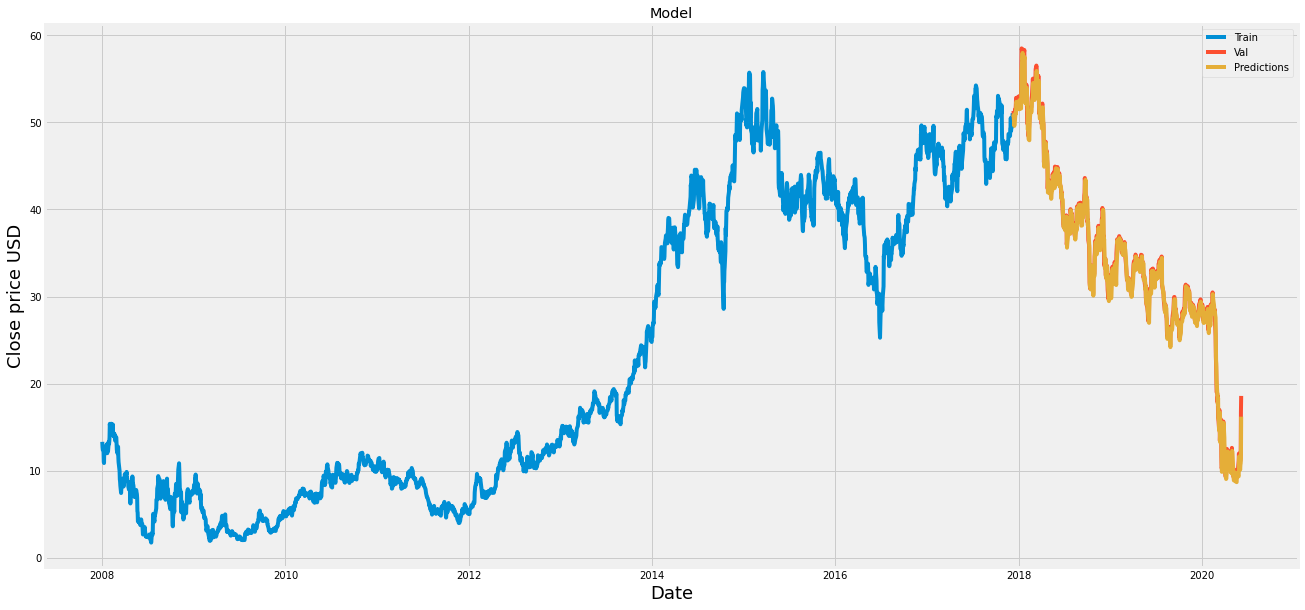

In [0]:
#Plot the data
train = data_ama[:training_data]
valid = data_ama[training_data:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize =18)
plt.ylabel('Close price USD', fontsize =18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()

In [0]:
valid

,Close,Predictions
Date,,
2017-12-11,51.299999,50.600166
2017-12-12,50.470001,50.835495
2017-12-13,50.090000,49.941528
2017-12-14,50.209999,49.576557
2017-12-15,51.060001,49.760033
...,...,...
2020-06-01,11.110000,10.120172
2020-06-02,11.220000,10.669436
2020-06-03,11.850000,10.859290


In [0]:
#Get the quote
american_airlines_quote = web.DataReader("AAL", "yahoo", start=('2008-01-01') , end=('2020-06-07'))
#Create new df
ama_df = american_airlines_quote.filter(['Close'])
#Get last 60 days closing prise and convert the df to an array
last_60_days = ama_df[-60:].values
#Scale the data to be values between 0 and 1 
last_60_days_scaled = scalar.transform(last_60_days)
#Create empty list 
x_test = []
#Append 
x_test.append(last_60_days_scaled)
#Convert into numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
#Predicted price
pred_price = model.predict(x_test)
#undo scaling
pred_price = scalar.inverse_transform(pred_price)
print(pred_price)

[[18.398613]]


It predicts the price i.e 18.39 on date 2020-06-07 which is a future prediction. According to the prediction, the price increases. It can be a good idea to invest money in American Airlines. As we all know it's not that easy to predict the share market as there are many other aspects involved in it. Previously it has been noticed in 2015, summer share prices suddenly raised which proves the uncertainty of the share market. This prediction is a little bit of help but it is always good to have something than nothing at all.
